In [1]:
!pip install pydataset

In [14]:
import pandas as pd
from pydataset import data # library with preinstalled datasets
from sklearn import datasets

churn = pd.read_csv(r'C:\Users\damir.pajaziti\Desktop\anakonda\Data\churn.csv', sep=',')

categorical_data = churn.select_dtypes(include = 'object')
numerical_data = churn.select_dtypes(exclude = 'object')


categorical_data.describe()

,State,Phone,Int'l Plan,VMail Plan,Churn?
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,329-9001,no,no,False.
freq,106,1,3010,2411,2850


In [15]:
numerical_data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [23]:
outcome = categorical_data.loc[:,'Churn?']
outcome

0       False.
1       False.
2       False.
3       False.
4       False.
5       False.
6       False.
7       False.
8       False.
9       False.
10       True.
11      False.
12      False.
13      False.
14      False.
15       True.
16      False.
17      False.
18      False.
19      False.
20      False.
21       True.
22      False.
23      False.
24      False.
25      False.
26      False.
27      False.
28      False.
29      False.
30      False.
31      False.
32      False.
33       True.
34      False.
35      False.
36      False.
37      False.
38      False.
39      False.
40      False.
41       True.
42      False.
43      False.
44      False.
45      False.
46      False.
47      False.
48       True.
49      False.
50      False.
51      False.
52      False.
53      False.
54       True.
55      False.
56      False.
57       True.
58      False.
59      False.
60      False.
61      False.
62      False.
63      False.
64      False.
65      False.
66      Fa

In [24]:
class_map = {'False.':0, 'True.':1}
outcome = outcome.map(class_map)
outcome

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      1
11      0
12      0
13      0
14      0
15      1
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      1
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      1
42      0
43      0
44      0
45      0
46      0
47      0
48      1
49      0
50      0
51      0
52      0
53      0
54      1
55      0
56      0
57      1
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      1
70      0
71      0
72      0
73      0
74      0
75      0
76      1
77      1
78      0
79      0
80      0
81      0
82      0
83      0
84      1
       ..
3248    0
3249    0
3250    0
3251    0
3252    0
3253    0
3254    0
3255    1
3256    0
3257    0
3258    0
3259    0
3260    0
3261    0


In [33]:
from sklearn.linear_model import LogisticRegression

# Ovde ucimo model
lr1 = LogisticRegression().fit(numerical_data, outcome)
lr1

predictions = lr1.predict(numerical_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix

accuracy_score(outcome, predictions)

0.8595859585958596

In [37]:
recall_score(outcome, predictions)

0.08902691511387163

In [45]:
cm = confusion_matrix(outcome, predictions)

In [49]:
import itertools
from matplotlib import pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.99017544 0.00982456]
 [0.91097308 0.08902692]]


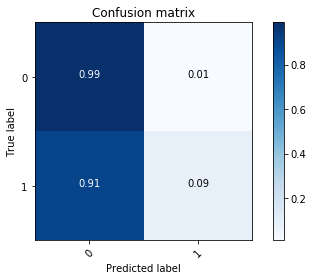

In [50]:
plot_confusion_matrix(cm, [0,1], normalize = True)

In [51]:
from sklearn.model_selection import train_test_split

# usual notation for train and test splits is X and y
X = numerical_data
y = outcome

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

lr1.fit(X_train, y_train)

y_pred = lr1.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
recall_score(y_test, y_pred)

0.05625

Confusion matrix, without normalization
[[932   8]
 [151   9]]


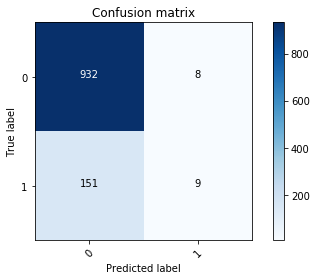

In [55]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0,1], normalize=False)


In [ ]:
# cross_val_score does cross validation and returns single score
from sklearn.model_selection import cross_val_score
# cross_validate allows evaluation based on multiple scores
from sklearn.model_selection import cross_validate

